# Plant - leaf - diseases

In [2]:
from fastai.vision.all import *
from pathlib import Path
from fastai.vision.widgets import FileUpload, ImageClassifierCleaner

In [2]:
path = Path.cwd()/'../datasets/Plant-leaf'

In [3]:
leaf_ = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        item_tfms = Resize(256),
        batch_tfms = aug_transforms(),
        get_y = parent_label,
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.4, seed = 42)
)

In [4]:
dls = leaf_.dataloaders(path)

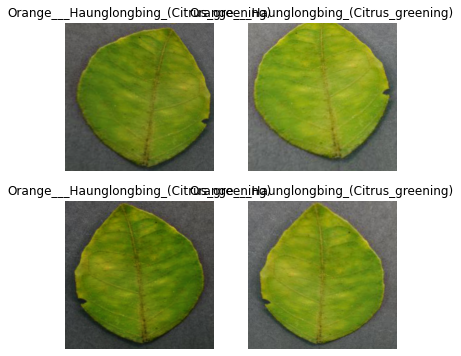

In [5]:
dls.train.show_batch(max_n = 4, nrows = 2, unique=True)

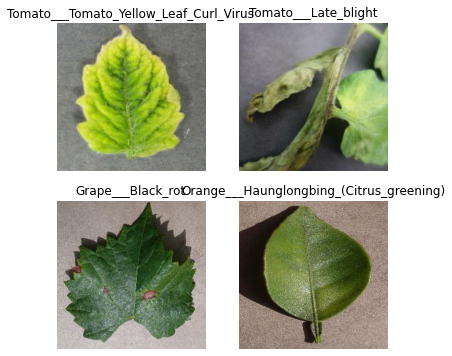

In [6]:
dls.valid.show_batch(max_n = 4, nrows = 2)

In [10]:
model = cnn_learner(dls, resnet18, metrics=[accuracy, error_rate], lr=0.01)
model.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.358427,0.174539,0.945171,0.054829,03:18


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.129205,0.076604,0.975555,0.024445,04:07
1,0.088835,0.066073,0.979146,0.020854,04:07
2,0.084455,0.089267,0.973529,0.026471,04:08
3,0.054707,0.034886,0.989228,0.010772,04:07
4,0.032993,0.036618,0.988629,0.011371,04:07
5,0.027930,0.026587,0.991806,0.008194,04:07
6,0.011717,0.019591,0.994752,0.005248,04:07
7,0.008748,0.015199,0.996087,0.003913,04:07
8,0.008146,0.014709,0.995673,0.004327,04:07
9,0.005440,0.014402,0.995811,0.004189,04:07


In [11]:
interp = ClassificationInterpretation.from_learner(model)

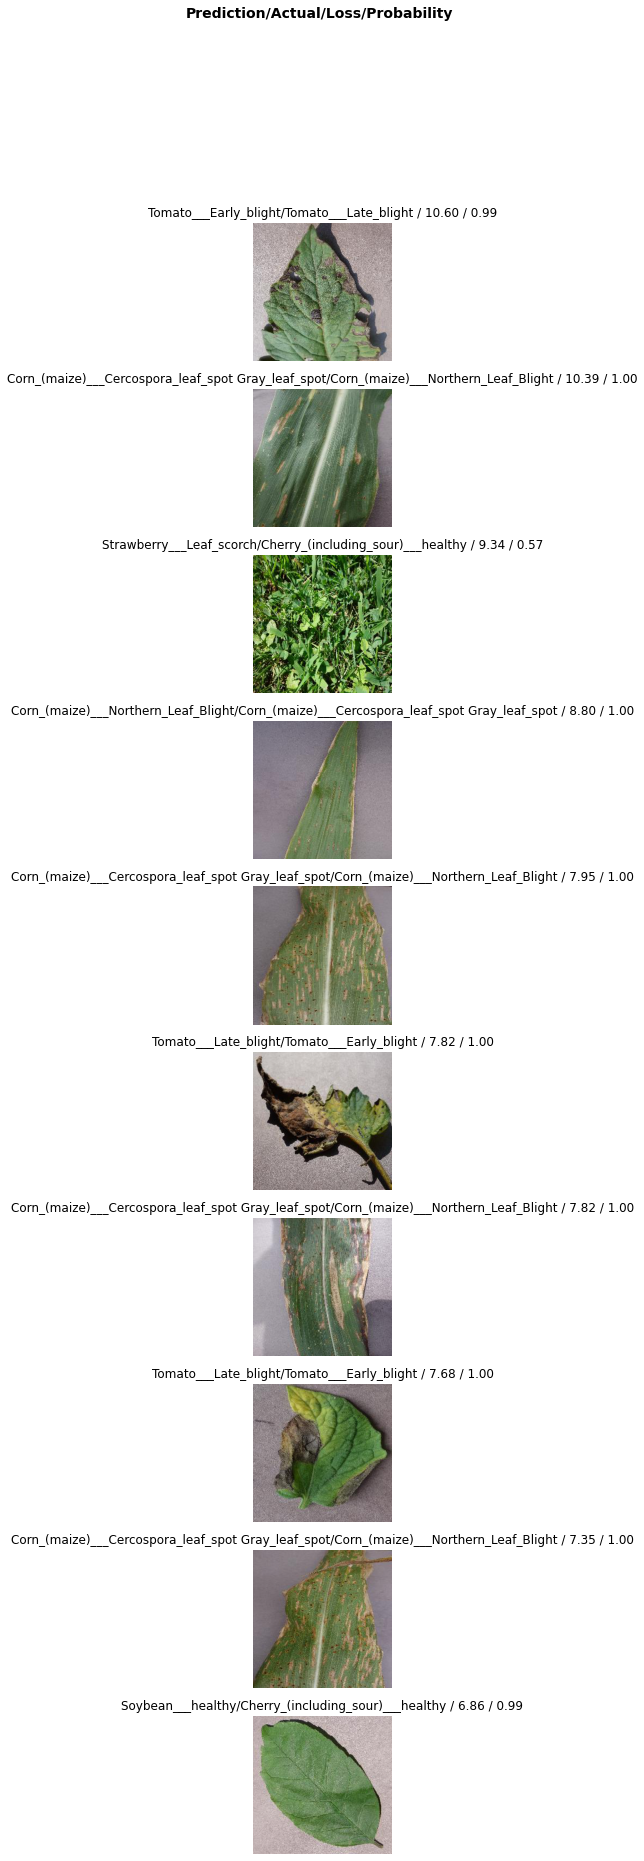

In [12]:
interp.plot_top_losses(10, nrows = 10)

In [22]:
model.export(fname = Path.cwd()/'../models/leaf-diseases-classifier-v2.pkl')

In [3]:
lModel = load_learner(Path.cwd()/'../models/leaf-diseases-classifie-v2.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/home/fastai-2020-lalkrishna/My-files/Projects/../models/leaf-diseases-classifie-v2.pkl'

In [18]:
btn_upload = FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [27]:
model.predict(btn_upload.data[0])

('Tomato___Bacterial_spot',
 tensor(28),
 tensor([2.5191e-10, 4.2352e-10, 9.0811e-08, 3.6032e-10, 3.1648e-10, 1.1474e-10,
         1.2787e-10, 5.3910e-07, 4.3971e-08, 3.8743e-07, 9.3438e-11, 5.0039e-10,
         7.3075e-10, 2.1800e-06, 3.4846e-09, 5.7399e-09, 9.7694e-08, 3.1485e-09,
         2.9767e-08, 2.1743e-10, 1.7110e-08, 1.1973e-08, 5.0072e-10, 8.8100e-11,
         2.6228e-11, 4.2868e-08, 3.4267e-09, 2.2586e-09, 1.0000e+00, 1.9023e-07,
         2.6203e-08, 3.6033e-08, 1.3476e-07, 9.0496e-08, 4.2851e-07, 4.1361e-07,
         8.0295e-10, 5.4238e-10]))